# Linear Algebra Exercises

This notebook contains the basic exercises on Linear Algebra. It will mainly focused on Matrix Algebra using the [numpy](https://numpy.org/doc/stable/) library.

#### Written for the QuantEcon African Workshop (July 2023)
#### Author: [Smit Lunagariya](https://github.com/Smit-create)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

### Exercise 1

Warm up on NumPy Basics.

Feel free to refer the [numpy documentation](https://numpy.org/doc/stable/reference/index.html) for API.

**Question 1.1**: Write a function that creates numpy array from any given list/tuple.

In [2]:
def create_array(x):
    return np.array(x)

In [3]:
# Test the solution
try:
    assert type(create_array([1, 2, 3])) == np.ndarray
    assert type(create_array((1, 2, 3))) == np.ndarray
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


**Question 1.2**: Write a function to return the transpose of the given matrix.

In [4]:
def get_transpose(x):
    return x.T

In [5]:
# Test the solution
try:
    assert np.allclose(get_transpose(np.arange(6).reshape((3,2))), np.array([[0, 2, 4], [1, 3, 5]]))
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


**Question 1.3**: Write a function to return the inverse of the given matrix.

In [6]:
def get_inverse(x):
    return np.linalg.inv(x)

In [7]:
# Test the solution
a_test = np.array([[1., 2.], [3., 4.]])
a_test_inv = get_inverse(a_test)
try:
    assert np.allclose(np.dot(a_test, a_test_inv), np.eye(2))
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


**Question 1.4**: Write a function to compute the 2-norm of the vector.

In [8]:
def get_norm(x):
    return np.linalg.norm(x)

In [9]:
# Test the solution
try:
    assert np.allclose(get_norm([1, 2, 2, 4, 12, 5]), 13.92838827718412)
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


**Question 1.5**: Write a function that returns the standarized vector of the given vector such that the mean is $0$ and standard deviation is $1$. Mathematically:
$$
\forall x_{i}\in x:\hspace{1em}x_{i}^{\prime}=\frac{x_{i}-\mu}{\sigma}
$$

In [10]:
def standardize(x):
    mean, std = x.mean(), x.std()
    return (x - mean) / std

In [11]:
# Test the solution
a_test = np.random.randint(100, 2000, size=1000)
a_test_stdz = standardize(a_test)
try:
    assert np.isclose(a_test_stdz.mean(), 0)
    assert np.isclose(a_test_stdz.std(), 1)
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


### Exercise 2

**Question 2.1**: Write a function that takes two numpy vectors as an argument and returns `True` if they are orthogonal else returns `False`.

*Note: Two vectors are called orthogonal if their inner product is zero.*

In [12]:
def is_orthogonal(x, y):
    return np.allclose(x.T @ y, 0)

In [13]:
# Test the solution
try:
    assert is_orthogonal(np.array([0, 1, 0, -2, 4]), np.array([-1, -4, 1, 2, 2]))
    assert not is_orthogonal(np.array([0, 1, 0, -2, 4]), np.array([-1, -4, 1, 2, 4]))
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


**Question 2.2**: Write a function to check whether the given matrix is symmetric or not.

In [14]:
def is_symmetric(x):
    if x.shape[0] != x.shape[1]:
        return False
    return np.allclose(x.T, x)

In [15]:
# Test the solution
try:
    assert is_symmetric(np.eye(3))
    assert is_symmetric(np.array([[1, 3], [3, 1]]))
    assert not is_symmetric(np.array([[0, 1, 0, -2, 4], [-1, -4, 1, 2, 2]]))
    print("Congratulations!")
except:
    print("Wrong answer, please check your code again.")

Congratulations!


### Exercise 3

**Question 3.1**: Given a matrix $A$, compute the eigenvalues, eigenvectors and plot them.

In [16]:
A = np.array([[1, 4], [5, 7]])
A

array([[1, 4],
       [5, 7]])

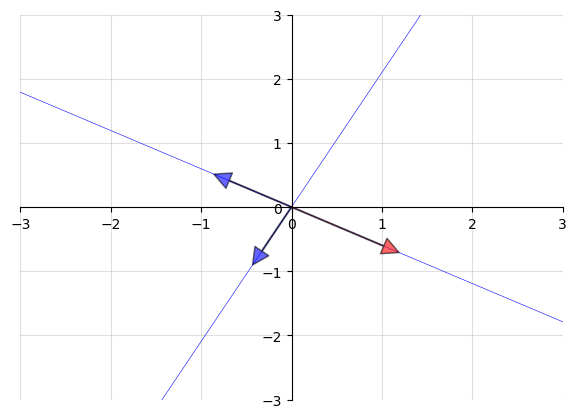

In [17]:
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(7, 5))

# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.grid(alpha=0.4)

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plot each eigenvector
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the image of each eigenvector
for v in evecs:
    z = A @ v
    ax.annotate('', xy=z, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the lines they run through
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()

### Exercise 4


Please refer to this [quantecon lecture](https://intro.quantecon.org/time_series_with_matrices.html) before solving this exercise.

Let $ t = 0, \pm 1, \pm 2, \ldots $ index time.

For $ t = 1, 2, 3, \ldots, T $ suppose that


<a id='equation-tswm-1'></a>
$$
y_{t} = \alpha_{0} + \alpha_{1} y_{t-1}
$$

where we assume that $ y_0 = 1$, $\alpha_{0}=5$, and $\alpha_{1}=1.2$.


**Question 4.1**: Use the matrix algebra to solve the above time series equation, and plot the solution.

*Hint:*


*Let’s write our equations as a stacked system*

$$
\underset{\equiv A}{\underbrace{\left[\begin{array}{cccccccc}
1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0\\
-\alpha_{1} & 1 & 0 & 0 & \cdots & 0 & 0 & 0\\
0 & -\alpha_{1} & 1 & 0 & \cdots & 0 & 0 & 0\\
0 & 0 & -\alpha_{1} & 1 & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \cdots & 0 & -\alpha_{1} & 1
\end{array}\right]}}\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
y_{4}\\
\vdots\\
y_{T}
\end{array}\right]=\underset{\equiv b}{\underbrace{\left[\begin{array}{c}
\alpha_{0}+\alpha_{1}y_{0}\\
\alpha_{0}\\
\alpha_{0}\\
\alpha_{0}\\
\vdots\\
\alpha_{0}
\end{array}\right]}}
$$

or

$$
A y = b
$$

where

$$
y = \begin{bmatrix} y_1 \cr y_2 \cr \vdots \cr y_T \end{bmatrix}
$$

In [18]:
# Parameters

T = 20

𝛼0 = 5.0
𝛼1 = 1.2

y0 = 1.0

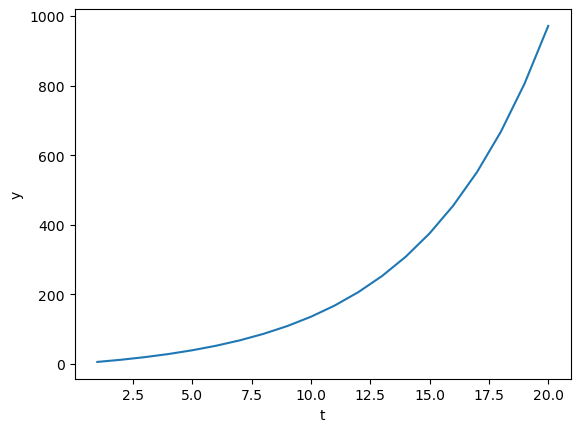

In [19]:
A = np.identity(T)  # The T x T identity matrix

for i in range(T):
    if i-1 >= 0:
        A[i, i-1] = -𝛼1

b = np.full(T, 𝛼0)
b[0] = 𝛼0 + 𝛼1 * y0

y = np.linalg.solve(A, b)

plt.plot(np.arange(T) + 1, y)
plt.xlabel('t')
plt.ylabel('y')

plt.show()